In [1]:
# Imports
import torch
from torch import nn  # All neural network modules
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch.utils.data import Dataset, DataLoader  # Gives easier dataset managment
import torchvision
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation

In [2]:
# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
#The MNIST dataset contains black and white, hand-written (numerical) digits that are 28x28 pixels large. 
train_dataset = datasets.CIFAR10(root="dataset/", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.CIFAR10(root="dataset/", train=False, transform=transforms.ToTensor(), download=True)
# root is the path where the train/test data is stored,
#train specifies training or test dataset,
#download=True downloads the data from the internet if it’s not available at root.
#transform specify the feature and label transformations. ToTensor converts a PIL image or NumPy ndarray into a FloatTensor and scales the image’s pixel intensity values in the range [0., 1.]

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting dataset/cifar-10-python.tar.gz to dataset/
Files already downloaded and verified


In [4]:
print(len(train_dataset)) 
print(len(test_dataset)) 

50000
10000


In [5]:
labels_map = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

<ipython-input-6-8e49e81d924a>:10: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3277.)
  plt.imshow(img.T)


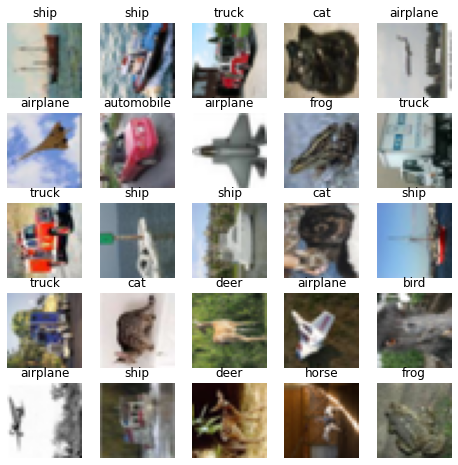

In [6]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(8, 8))
cols, rows = 5,5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.T)
plt.show()

In [7]:
# Define relevant variables 
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 25

In [8]:
# Making dataset iterable
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size)

In [9]:
# Creating a CNN class
class ConvNeuralNet(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.fc1 = nn.Linear(1600, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.max_pool1(out)
        
        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.max_pool2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [10]:
model = ConvNeuralNet(num_classes).to(device)

# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [11]:
# We use the pre-defined number of epochs to determine how many iterations to train the network on
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))          

Epoch [1/25], Loss: 2.3085
Epoch [2/25], Loss: 2.3067
Epoch [3/25], Loss: 2.3055
Epoch [4/25], Loss: 2.3030
Epoch [5/25], Loss: 2.2980
Epoch [6/25], Loss: 2.2880
Epoch [7/25], Loss: 2.2676
Epoch [8/25], Loss: 2.2333
Epoch [9/25], Loss: 2.2414
Epoch [10/25], Loss: 2.2806
Epoch [11/25], Loss: 2.3020
Epoch [12/25], Loss: 2.3052
Epoch [13/25], Loss: 2.3102
Epoch [14/25], Loss: 2.3078
Epoch [15/25], Loss: 2.2918
Epoch [16/25], Loss: 2.2852
Epoch [17/25], Loss: 2.2829
Epoch [18/25], Loss: 2.2687
Epoch [19/25], Loss: 2.2641
Epoch [20/25], Loss: 2.2584
Epoch [21/25], Loss: 2.2427
Epoch [22/25], Loss: 2.2223
Epoch [23/25], Loss: 2.2151
Epoch [24/25], Loss: 2.1896
Epoch [25/25], Loss: 2.1563


In [12]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the network on the {} train images: {} %'.format(50000, 100 * correct / total))

Accuracy of the network on the 50000 train images: 36.376 %


Dropout is a regularization technique that “drops out” or “deactivates” few neurons in the neural network randomly in order to avoid the problem of overfitting.

In [13]:
# Creating a CNN class
class ConvNeuralNet(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.fc1 = nn.Linear(1600, 128)
        self.Dropout = nn.Dropout(0.25)
        
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.max_pool1(out)
        out = self.Dropout(out)
        
        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.max_pool2(out)
        out = self.Dropout(out)

        out = out.reshape(out.size(0), -1)

        out = self.fc1(out)
        out = self.Dropout(out)
        out = self.relu1(out)
        
        out = self.fc2(out)
        return out

In [14]:
model = ConvNeuralNet(num_classes).to(device)

# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [15]:
# We use the pre-defined number of epochs to determine how many iterations to train the network on
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))          

Epoch [1/25], Loss: 2.2907
Epoch [2/25], Loss: 2.2910
Epoch [3/25], Loss: 2.2981
Epoch [4/25], Loss: 2.2970
Epoch [5/25], Loss: 2.2961
Epoch [6/25], Loss: 2.2918
Epoch [7/25], Loss: 2.2981
Epoch [8/25], Loss: 2.2965
Epoch [9/25], Loss: 2.2839
Epoch [10/25], Loss: 2.2831
Epoch [11/25], Loss: 2.2823
Epoch [12/25], Loss: 2.3175
Epoch [13/25], Loss: 2.3410
Epoch [14/25], Loss: 2.3244
Epoch [15/25], Loss: 2.2480
Epoch [16/25], Loss: 2.1656
Epoch [17/25], Loss: 2.3245
Epoch [18/25], Loss: 2.1453
Epoch [19/25], Loss: 2.3103
Epoch [20/25], Loss: 2.2361
Epoch [21/25], Loss: 2.3328
Epoch [22/25], Loss: 2.3072
Epoch [23/25], Loss: 2.2767
Epoch [24/25], Loss: 2.4361
Epoch [25/25], Loss: 2.1896


In order to bring all the activation values to the same scale, we normalize the activation values such that the hidden representation doesn’t vary drastically and also helps us to get improvement in the training speed. Since we are computing the mean and standard deviation from a single batch as opposed to computing it from the entire data. Batch normalization is done individually at each hidden neuron in the network.

In [16]:
# Creating a CNN class
class ConvNeuralNet(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.bn1 = nn.BatchNorm2d(32)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.bn2 = nn.BatchNorm2d(64)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.fc1 = nn.Linear(1600, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.bn1(out)
        out = self.max_pool1(out)
        
        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.bn2(out)
        out = self.max_pool2(out)
        
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [17]:
model = ConvNeuralNet(num_classes).to(device)

# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [18]:
# We use the pre-defined number of epochs to determine how many iterations to train the network on
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))          

Epoch [1/25], Loss: 2.0323
Epoch [2/25], Loss: 1.9903
Epoch [3/25], Loss: 1.9583
Epoch [4/25], Loss: 1.9129
Epoch [5/25], Loss: 1.8954
Epoch [6/25], Loss: 1.9174
Epoch [7/25], Loss: 1.9070
Epoch [8/25], Loss: 1.8771
Epoch [9/25], Loss: 1.8386
Epoch [10/25], Loss: 1.7960
Epoch [11/25], Loss: 1.7441
Epoch [12/25], Loss: 1.6865
Epoch [13/25], Loss: 1.6345
Epoch [14/25], Loss: 1.5847
Epoch [15/25], Loss: 1.5360
Epoch [16/25], Loss: 1.4892
Epoch [17/25], Loss: 1.4459
Epoch [18/25], Loss: 1.4005
Epoch [19/25], Loss: 1.3540
Epoch [20/25], Loss: 1.3116
Epoch [21/25], Loss: 1.2704
Epoch [22/25], Loss: 1.2283
Epoch [23/25], Loss: 1.1901
Epoch [24/25], Loss: 1.1520
Epoch [25/25], Loss: 1.1133


In [19]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the network on the {} train images: {} %'.format(50000, 100 * correct / total))

Accuracy of the network on the 50000 train images: 68.838 %
